# Data Collection

In [1]:
import yfinance as yf
import pandas as pd

# Set ticker and period
ticker = "AAPL"  # Replace with your desired symbol
stock = yf.Ticker(ticker)

# Download full historical data
df = stock.history(period="max", interval="1d", auto_adjust=False)



In [2]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.122210,0.122210,0.121652,0.121652,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.113281,0.113281,0.112723,0.112723,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,0.091309,73449600,0.0,0.0


# Data Preprossing

In [3]:
# Reset index to make 'Date' a column
df.reset_index(inplace=True)

# Add 'symbol' column
df['symbol'] = ticker

# Get dividend and split data
actions = stock.actions.reset_index()
dividends = actions[['Date', 'Dividends']].rename(columns={'Dividends': 'divCash'})
splits = actions[['Date', 'Stock Splits']].rename(columns={'Stock Splits': 'splitFactor'})

# Merge actions into main dataframe
df = df.merge(dividends, on='Date', how='left')
df = df.merge(splits, on='Date', how='left')

# Fill NaN for divCash and splitFactor as 0 and 1 respectively
df['divCash'] = df['divCash'].fillna(0.0)
df['splitFactor'] = df['splitFactor'].fillna(1.0)

# Rename columns to match your format
df.rename(columns={
    'Date': 'date',
    'Close': 'close',
    'High': 'high',
    'Low': 'low',
    'Open': 'open',
    'Volume': 'volume',
    'Adj Close': 'adjClose'
}, inplace=True)

# Optional: Reorder columns
df = df[['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 
         'divCash', 'splitFactor']]

# Preview data
print(df.head())

# Check total rows
print("\nTotal rows:", len(df))


  symbol                      date     close      high       low      open  \
0   AAPL 1980-12-12 00:00:00-05:00  0.128348  0.128906  0.128348  0.128348   
1   AAPL 1980-12-15 00:00:00-05:00  0.121652  0.122210  0.121652  0.122210   
2   AAPL 1980-12-16 00:00:00-05:00  0.112723  0.113281  0.112723  0.113281   
3   AAPL 1980-12-17 00:00:00-05:00  0.115513  0.116071  0.115513  0.115513   
4   AAPL 1980-12-18 00:00:00-05:00  0.118862  0.119420  0.118862  0.118862   

      volume  adjClose  divCash  splitFactor  
0  469033600  0.098597      0.0          1.0  
1  175884800  0.093453      0.0          1.0  
2  105728000  0.086594      0.0          1.0  
3   86441600  0.088737      0.0          1.0  
4   73449600  0.091309      0.0          1.0  

Total rows: 11242


In [4]:
# Set 'Date' column as index
df.set_index('date', inplace=True)

# Save to CSV with index (which is now 'Date')
df.to_csv(f"{ticker}_historical_data.csv")

print(f"Data saved as '{ticker}_historical_data.csv' ")


arima_df = df
sarima_df = df
prophet_df = df
lstm_df = df


Data saved as 'AAPL_historical_data.csv' 


In [5]:
df1=df.reset_index()['close'] #Arima
df2=df.reset_index()['close'] #Sarima
df3=df.reset_index()['close'] #prophet
df4=df.reset_index()['close'] #Lstm

# 1. Arima

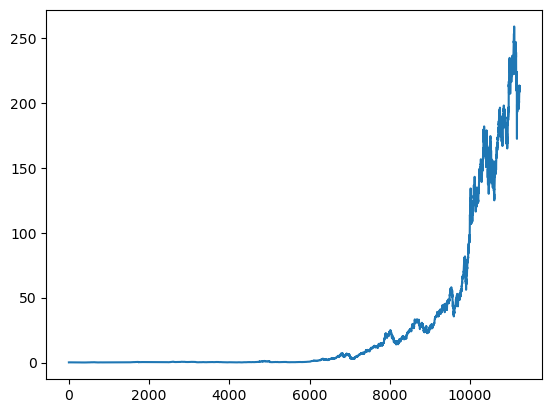

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
arima_df.shape

(11242, 10)

In [8]:
arima_df.head()

,symbol,date,close,high,low,open,volume,adjClose,divCash,splitFactor
0,AAPL,1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,0.0,1.0
1,AAPL,1980-12-15 00:00:00-05:00,0.121652,0.122210,0.121652,0.122210,175884800,0.093453,0.0,1.0
2,AAPL,1980-12-16 00:00:00-05:00,0.112723,0.113281,0.112723,0.113281,105728000,0.086594,0.0,1.0
3,AAPL,1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,0.0,1.0
4,AAPL,1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,0.0,1.0


In [9]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=41510.525, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=38066.989, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=41508.525, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=37072.171, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=36416.659, Time=0.60 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=35899.611, Time=0.80 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=35557.339, Time=0.98 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.27 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.67 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=35555.340, Time=0.45 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=35897.611, Time=0.33 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.51 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Ti

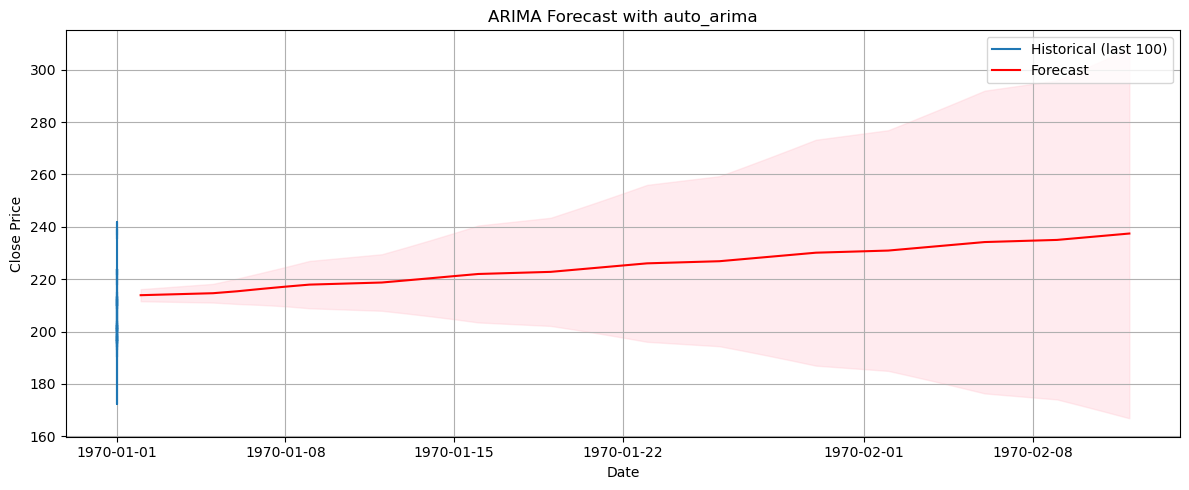

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pmdarima import auto_arima
warnings.filterwarnings("ignore")

# Use the same `arima_df` from before
arima_df.index = pd.to_datetime(arima_df.index)
arima_df.sort_index(inplace=True)
ts1 = arima_df['close']

# Fit the optimal ARIMA model
stepwise_model = auto_arima(ts1, start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            d=None, seasonal=False,
                            trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Forecast the next 30 business days
n_periods = 30
forecast, conf_int = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

# Create future dates
future_dates = pd.date_range(start=ts1.index[-1], periods=n_periods + 1, freq='B')[1:]

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(ts1[-100:], label='Historical (last 100)')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast with auto_arima')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Split the series (last 30 points for testing)
train = ts1[:-30]
test = ts1[-30:]

In [12]:
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            d=None, seasonal=False,
                            trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.72 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=41304.923, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=37882.192, Time=0.32 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=41302.924, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36881.140, Time=0.47 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=36233.001, Time=0.59 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=35714.767, Time=0.74 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=35377.486, Time=0.98 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.68 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.22 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=35375.486, Time=0.42 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=35712.767, Time=0.30 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.55 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Ti

In [13]:
n_periods = len(test)
forecast, conf_int = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

In [14]:
import numpy as np

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast, squared=False)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"ARIMA Model Evaluation (on test set):")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")

ARIMA Model Evaluation (on test set):
MAE  = 9.1641
RMSE = 9.6856
MAPE = 4.47%


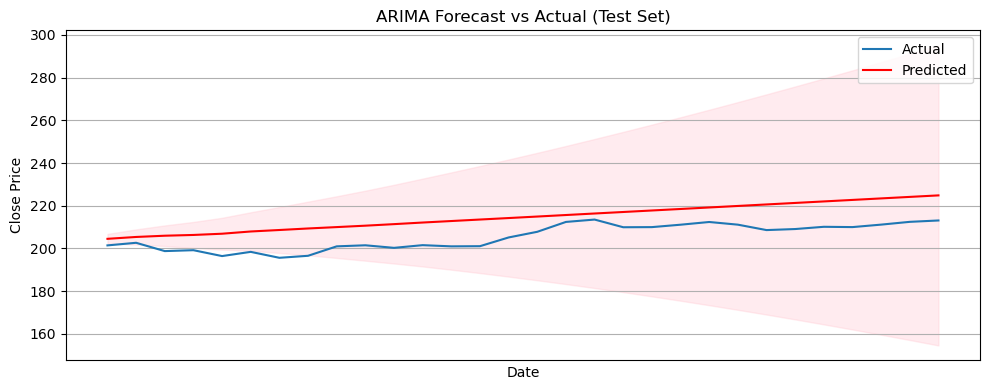

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Predicted", color="red")
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import joblib
import os

# Save the trained ARIMA model
joblib.dump(stepwise_model, "models/arima_model.pkl")

print("ARIMA model saved successfully at models/arima_model.pkl")


ARIMA model saved successfully at models/arima_model.pkl


# 2. sarima

In [19]:
sarima_df.head()

,symbol,date,close,high,low,open,volume,adjClose,divCash,splitFactor
1970-01-01 00:00:00.000000000,AAPL,1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,0.0,1.0
1970-01-01 00:00:00.000000001,AAPL,1980-12-15 00:00:00-05:00,0.121652,0.122210,0.121652,0.122210,175884800,0.093453,0.0,1.0
1970-01-01 00:00:00.000000002,AAPL,1980-12-16 00:00:00-05:00,0.112723,0.113281,0.112723,0.113281,105728000,0.086594,0.0,1.0
1970-01-01 00:00:00.000000003,AAPL,1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,0.0,1.0
1970-01-01 00:00:00.000000004,AAPL,1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,0.0,1.0


In [20]:
df2.head()

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: close, dtype: float64

In [21]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


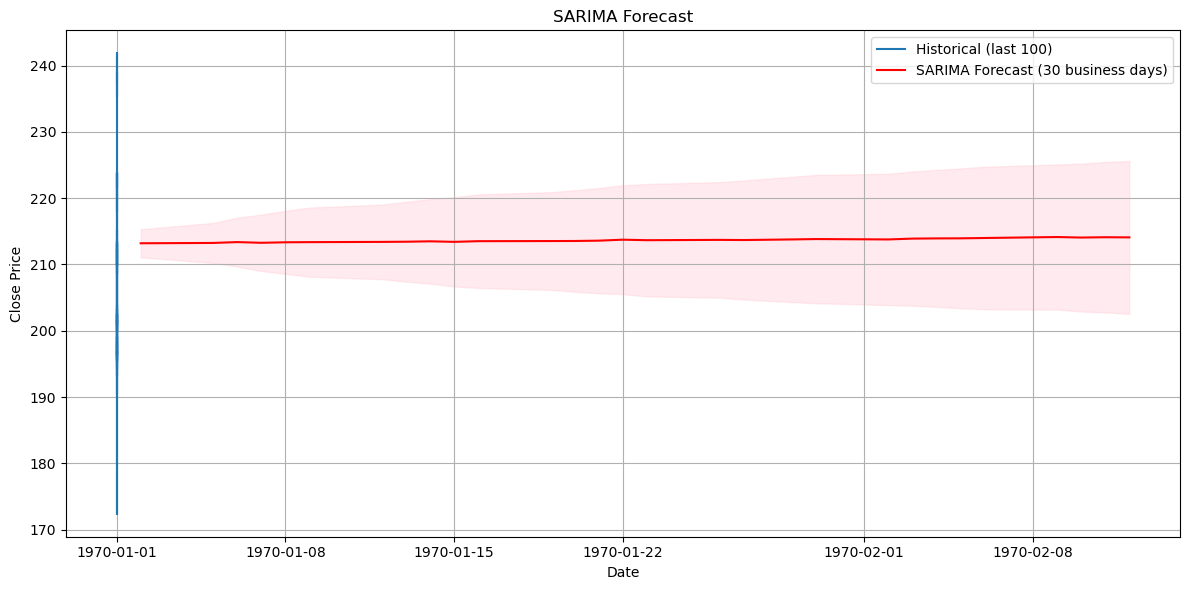

Next 30 Business Days Forecast:
1970-01-02 00:00:00.000011241    213.201227
1970-01-05 00:00:00.000011241    213.249835
1970-01-06 00:00:00.000011241    213.378346
1970-01-07 00:00:00.000011241    213.272937
1970-01-08 00:00:00.000011241    213.347197
1970-01-09 00:00:00.000011241    213.371374
1970-01-12 00:00:00.000011241    213.408145
1970-01-13 00:00:00.000011241    213.434266
1970-01-14 00:00:00.000011241    213.495870
1970-01-15 00:00:00.000011241    213.414493
1970-01-16 00:00:00.000011241    213.515787
1970-01-19 00:00:00.000011241    213.535294
1970-01-20 00:00:00.000011241    213.545294
1970-01-21 00:00:00.000011241    213.594850
1970-01-22 00:00:00.000011241    213.741812
1970-01-23 00:00:00.000011241    213.663471
1970-01-26 00:00:00.000011241    213.711644
1970-01-27 00:00:00.000011241    213.687437
1970-01-28 00:00:00.000011241    213.732166
1970-01-29 00:00:00.000011241    213.778617
1970-01-30 00:00:00.000011241    213.835640
1970-02-02 00:00:00.000011241    213.778756


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Assuming sarima_df is already loaded and 'close' column exists
sarima_df.index = pd.to_datetime(sarima_df.index)
sarima_df = sarima_df.sort_index()

# Use only the 'close' column as a time series
ts = sarima_df['close']

# Fit SARIMA model manually (you can tune order/seasonal_order)
model = SARIMAX(ts,
                order=(1, 1, 1),              # p,d,q — try adjusting
                seasonal_order=(1, 1, 1, 12), # P,D,Q,m — 12 = monthly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecasting next 30 business days
n_steps = 30
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_steps, freq='B')

forecast = results.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create forecast series with future dates
forecast_series = pd.Series(forecast_mean.values, index=future_dates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ts[-100:], label='Historical (last 100)')
plt.plot(forecast_series, label='SARIMA Forecast (30 business days)', color='red')
plt.fill_between(future_dates, 
                 forecast_ci.iloc[:, 0].values, 
                 forecast_ci.iloc[:, 1].values, 
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show forecast table
print("Next 30 Business Days Forecast:")
print(forecast_series)


In [23]:
train = ts[:-30]
test = ts[-30:]

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

In [25]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_mean)
rmse = mean_squared_error(test, forecast_mean, squared=False)
mape = np.mean(np.abs((test - forecast_mean) / test)) * 100

print("SARIMA Model Evaluation (on test set):")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")

SARIMA Model Evaluation (on test set):
MAE  = 5.3092
RMSE = 5.7475
MAPE = 2.58%


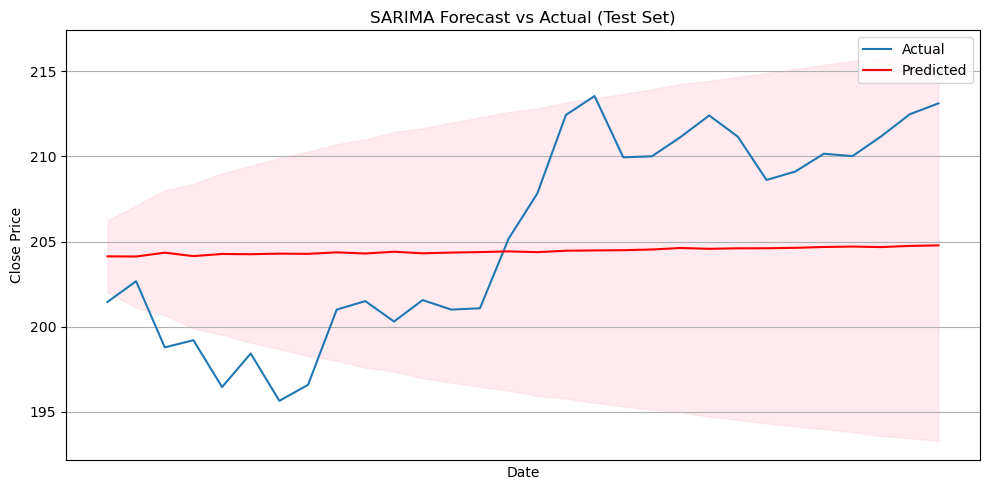

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_mean, label='Predicted', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
import joblib
import os

# Save SARIMA model
joblib.dump(results, "models/sarima_model.pkl")

print("SARIMA model saved at models/sarima_model.pkl")


SARIMA model saved at models/sarima_model.pkl


# 3. Prophet

In [29]:
prophet_df.head()

,symbol,date,close,high,low,open,volume,adjClose,divCash,splitFactor
1970-01-01 00:00:00.000000000,AAPL,1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,0.0,1.0
1970-01-01 00:00:00.000000001,AAPL,1980-12-15 00:00:00-05:00,0.121652,0.122210,0.121652,0.122210,175884800,0.093453,0.0,1.0
1970-01-01 00:00:00.000000002,AAPL,1980-12-16 00:00:00-05:00,0.112723,0.113281,0.112723,0.113281,105728000,0.086594,0.0,1.0
1970-01-01 00:00:00.000000003,AAPL,1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,0.0,1.0
1970-01-01 00:00:00.000000004,AAPL,1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,0.0,1.0


In [30]:
df3.head()

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: close, dtype: float64

22:10:30 - cmdstanpy - INFO - Chain [1] start processing
22:10:33 - cmdstanpy - INFO - Chain [1] done processing


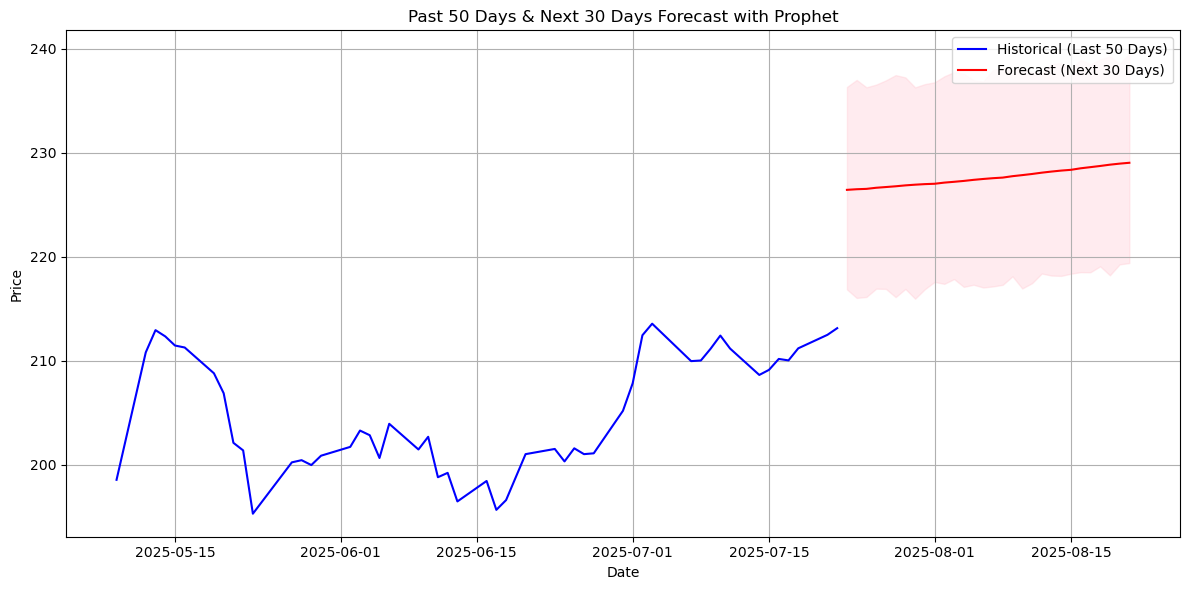

In [31]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare your data (no reset_index here!)
df_prophet = prophet_df[['date', 'close']].copy()

# Step 2: Rename columns for Prophet
df_prophet['date'] = pd.to_datetime(df_prophet['date']).dt.tz_localize(None)
df_prophet.rename(columns={'date': 'ds', 'close': 'y'}, inplace=True)

# Step 3: Fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Step 4: Forecast the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Step 5: Plot past 50 days + next 30 days
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'][-50:], df_prophet['y'][-50:], label='Historical (Last 50 Days)', color='blue')
plt.plot(forecast['ds'][-30:], forecast['yhat'][-30:], label='Forecast (Next 30 Days)', color='red')
plt.fill_between(forecast['ds'][-30:], forecast['yhat_lower'][-30:], forecast['yhat_upper'][-30:], color='pink', alpha=0.3)
plt.title("Past 50 Days & Next 30 Days Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Assume 'df_prophet' is already prepared with columns 'ds' and 'y'
train = df_prophet[:-30]
test = df_prophet[-30:]


In [33]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train)

# Create future dataframe to match test length
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Get forecast for only the test period
forecast_test = forecast.tail(30)


22:10:40 - cmdstanpy - INFO - Chain [1] start processing
22:10:43 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Prophet Model Evaluation (on test set):")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")


Prophet Model Evaluation (on test set):
MAE  = 18.0619
RMSE = 18.7476
MAPE = 8.87%


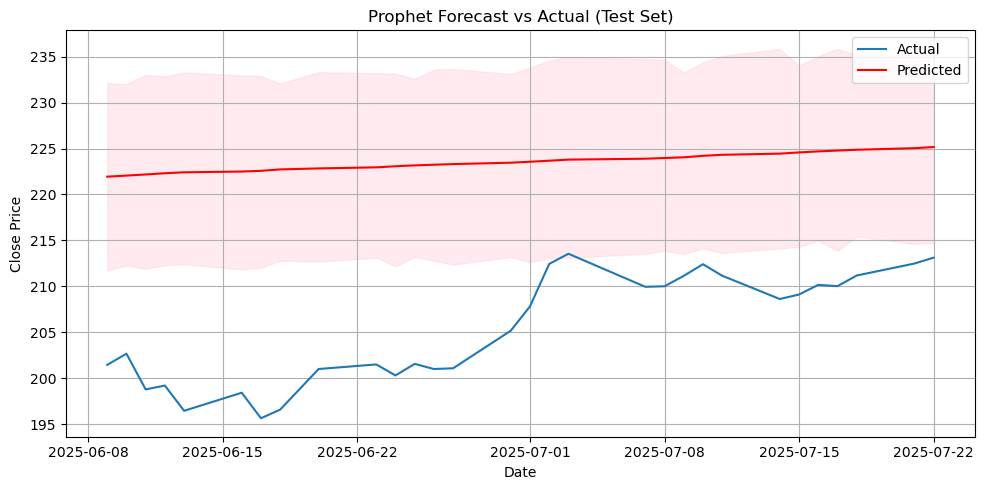

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted', color='red')
plt.fill_between(test['ds'], 
                 forecast_test['yhat_lower'], 
                 forecast_test['yhat_upper'], 
                 color='pink', alpha=0.3)
plt.title('Prophet Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
import joblib
import os

# Save the trained Prophet model
joblib.dump(model_prophet, "models/prophet_model.pkl")
print("Prophet model saved as 'models/prophet_model.pkl'")


Prophet model saved as 'models/prophet_model.pkl'


# 4. LSTM

In [57]:
lstm_df.head()

,symbol,date,close,high,low,open,volume,adjClose,divCash,splitFactor
1970-01-01 00:00:00.000000000,AAPL,1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,0.0,1.0
1970-01-01 00:00:00.000000001,AAPL,1980-12-15 00:00:00-05:00,0.121652,0.122210,0.121652,0.122210,175884800,0.093453,0.0,1.0
1970-01-01 00:00:00.000000002,AAPL,1980-12-16 00:00:00-05:00,0.112723,0.113281,0.112723,0.113281,105728000,0.086594,0.0,1.0
1970-01-01 00:00:00.000000003,AAPL,1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,0.0,1.0
1970-01-01 00:00:00.000000004,AAPL,1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,0.0,1.0


In [58]:
df4.head()

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: close, dtype: float64

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [60]:
# Convert df4 to NumPy array
data = df4.values.reshape(-1, 1)

# Normalize data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define how many days into the past you want to use to predict the next day
look_back = 60

X = []
y = []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i - look_back:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [61]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
model.fit(X, y, batch_size=64, epochs=100)

Epoch 1/100
175/175 [==============================] - 6s 29ms/step - loss: 0.0020
Epoch 2/100
175/175 [==============================] - 5s 28ms/step - loss: 1.0208e-04
Epoch 3/100
175/175 [==============================] - 5s 29ms/step - loss: 8.9481e-05
Epoch 4/100
175/175 [==============================] - 5s 28ms/step - loss: 8.4892e-05
Epoch 5/100
175/175 [==============================] - 5s 28ms/step - loss: 8.0091e-05
Epoch 6/100
175/175 [==============================] - 5s 28ms/step - loss: 7.2773e-05
Epoch 7/100
175/175 [==============================] - 5s 29ms/step - loss: 7.1764e-05
Epoch 8/100
175/175 [==============================] - 5s 30ms/step - loss: 8.4809e-05
Epoch 9/100
175/175 [==============================] - 5s 30ms/step - loss: 7.1487e-05
Epoch 10/100
175/175 [==============================] - 5s 30ms/step - loss: 6.4235e-05
Epoch 11/100
175/175 [==============================] - 5s 28ms/step - loss: 5.6608e-05
Epoch 12/100
175/175 [=======================

175/175 [==============================] - 5s 29ms/step - loss: 2.4285e-05
Epoch 95/100
175/175 [==============================] - 5s 29ms/step - loss: 2.2797e-05
Epoch 96/100
175/175 [==============================] - 5s 31ms/step - loss: 2.1815e-05
Epoch 97/100
175/175 [==============================] - 5s 28ms/step - loss: 2.1378e-05
Epoch 98/100
175/175 [==============================] - 5s 28ms/step - loss: 2.3770e-05
Epoch 99/100
175/175 [==============================] - 5s 28ms/step - loss: 2.1184e-05
Epoch 100/100
175/175 [==============================] - 5s 30ms/step - loss: 2.2531e-05


350/350 [==============================] - 2s 5ms/step


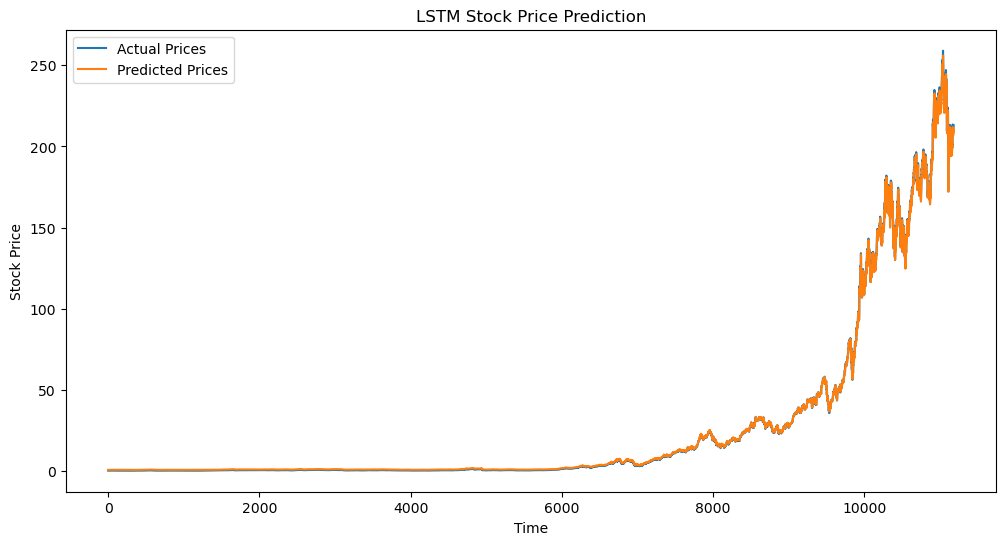

In [63]:
# Predict on training data (you can use test split too)
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)  # Unscale predictions

# Unscale actual y values
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


In [64]:
# Get the last 60 values from the scaled dataset
last_60_days = scaled_data[-look_back:]
future_input = last_60_days.reshape(1, look_back, 1)


In [65]:
future_predictions = []

for _ in range(50):
    prediction = model.predict(future_input)

    # Save the prediction
    future_predictions.append(prediction[0, 0])

    # Reshape prediction to (1, 1, 1)
    next_input = prediction.reshape(1, 1, 1)

    # Append the prediction to the input sequence and remove the first timestep
    future_input = np.append(future_input[:, 1:, :], next_input, axis=1)


1/1 [==============================] - 0s 9ms/step


In [66]:
# Rescale to original price range
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [67]:
# Get last date in original df
last_date = pd.to_datetime(df4.index[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=50)


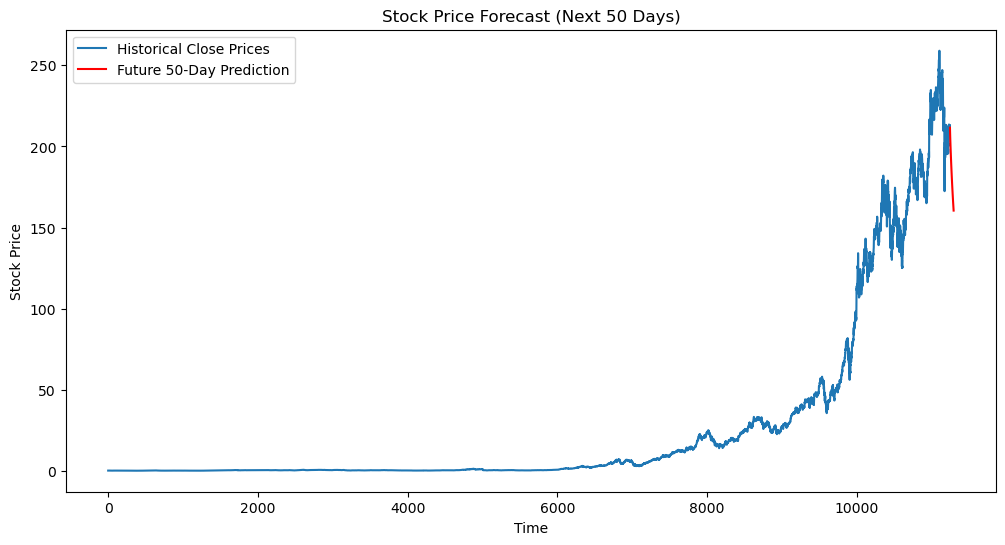

In [68]:
plt.figure(figsize=(12,6))
plt.plot(df4.values, label='Historical Close Prices')
plt.plot(range(len(df4), len(df4) + 50), future_predictions, label='Future 50-Day Prediction', color='red')
plt.title('Stock Price Forecast (Next 50 Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [69]:
look_back = 60
test_size = 30

# Split scaled data into training and testing
train_data = scaled_data[:-test_size]
test_data = scaled_data[-(test_size + look_back):]  # add look_back to build test sequences

# Build training set
X_train = []
y_train = []

for i in range(look_back, len(train_data)):
    X_train.append(train_data[i - look_back:i, 0])
    y_train.append(train_data[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [70]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)


In [71]:
X_test = []
y_test = []

for i in range(look_back, len(test_data)):
    X_test.append(test_data[i - look_back:i, 0])
    y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [72]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 [==============================] - 0s 245ms/step


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_rescaled, predictions)
rmse = mean_squared_error(y_test_rescaled, predictions, squared=False)
mape = np.mean(np.abs((y_test_rescaled - predictions) / y_test_rescaled)) * 100

print("LSTM Model Evaluation (on test set):")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")


LSTM Model Evaluation (on test set):
MAE  = 1.6821
RMSE = 2.1321
MAPE = 0.82%


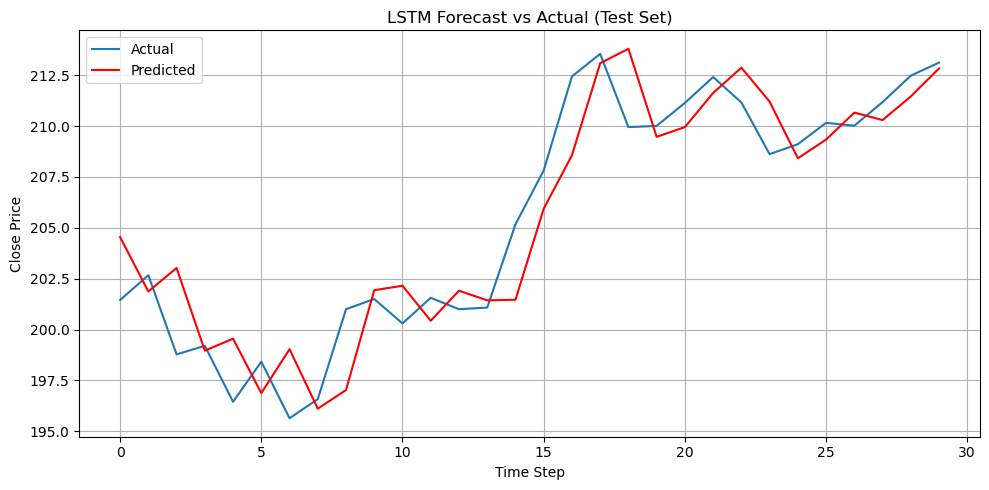

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('LSTM Forecast vs Actual (Test Set)')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
import os
import joblib

# Save the LSTM model
model.save("models/lstm_model.h5")
print("LSTM model saved as 'models/lstm_model.h5'")

# Save the scaler
joblib.dump(scaler, "models/lstm_scaler.pkl")
print("Scaler saved as 'models/lstm_scaler.pkl'")


LSTM model saved as 'models/lstm_model.h5'
Scaler saved as 'models/lstm_scaler.pkl'
